### Part 2 (2nd and 3rd datasets)

In [1]:
pip install efficient_apriori

Note: you may need to restart the kernel to use updated packages.


In [108]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from sklearn.preprocessing import StandardScaler
import os
from efficient_apriori import apriori as ap

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
def get_df_from_json(data_file_path):
    data_file = open(data_file_path, 'r', encoding='utf-8')
    data = []
    # Get the total number of lines in the file for tqdm
    for line in data_file:
        data.append(json.loads(line))
    data_file.close()
    return pd.DataFrame.from_dict(data, orient='columns')

def data_generator(df):
        for _, row in df.dropna().iterrows():
            transaction = frozenset(str(item) for item in row)
            yield transaction


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Dataset: Tree Survival Prediction (59kB)

In [126]:
tree_df = pd.read_csv('Tree_Data.csv')
tree_df.shape

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2783, 24)

In [127]:
tree_df.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [128]:
has_nan = tree_df.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame contains NaN values.


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Change nulls to 0
tree_df.fillna(0,inplace=True)
has_nan = tree_df.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
tree_df

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,0.00,-0.56,13.86,12.15,4,14.0,1.0,0,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,0,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,0,0
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,0.00,-0.71,14.29,12.36,4,14.0,1.0,0,0
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,0.00,-0.58,10.85,11.20,4,14.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,0.00,0.83,9.15,11.88,16,56.0,1.0,0,0
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,0,0
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,0,0
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,0.0,0,0


In [131]:
# Find the unique number of items in each column
unique_counts = tree_df.nunique()

# Display the result
print("Unique Number of Items in Each Column:")
print(unique_counts)

Unique Number of Items in Each Column:
No             2783
Plot             18
Subplot           5
Species           4
Light_ISF        53
Light_Cat         3
Core              2
Soil              7
Adult            36
Sterile           2
Conspecific       3
Myco              2
SoilMyco          3
PlantDate        19
AMF             924
EMF             682
Phenolics       494
Lignin         1095
NSC             998
Census           22
Time             22
Event             2
Harvest           2
Alive             2
dtype: int64


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
# renaming columns for more clarity
tree_df.rename(columns={'Sterile': 'SterileSoil'}, inplace=True)
tree_df.rename(columns={'No':'PlantID'}, inplace=True)

#Event: Used for survival analysis to indicate status of each individual seedling at a given time (Column=Time)
#0 = harvested or experiment ended
#1 = dead
tree_df['Event'].replace({1: 'dead'}, inplace=True)
tree_df['Event'].replace({0: 'harvested'}, inplace=True)

# List of column to drop
columns_to_drop = ['Harvest', 'Alive', 'PlantDate']
tree_df = tree_df.drop(columns=columns_to_drop)


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
tree_df

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PlantID,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,SterileSoil,...,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,AMF,AMF,22.00,0.00,-0.56,13.86,12.15,4,14.0,dead
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,EMF,EMF,15.82,31.07,5.19,20.52,19.29,33,115.5,harvested
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,EMF,AMF,24.45,28.19,3.36,24.74,15.01,18,63.0,dead
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,AMF,AMF,22.23,0.00,-0.71,14.29,12.36,4,14.0,dead
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,AMF,AMF,21.15,0.00,-0.58,10.85,11.20,4,14.0,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,AMF,EMF,40.89,0.00,0.83,9.15,11.88,16,56.0,dead
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,EMF,AMF,15.47,32.82,4.88,19.01,23.50,16,56.0,dead
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,EMF,EMF,11.96,37.67,5.51,21.13,19.10,16,56.0,dead
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,EMF,Sterile,16.99,22.51,4.28,19.38,21.36,33,115.5,harvested


In [134]:
for column in tree_df.columns:
    tree_df[column] = tree_df[column].apply(lambda x: f"{column}_{x}")

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
tree_df.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PlantID,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,SterileSoil,...,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
0,PlantID_126,Plot_1,Subplot_C,Species_Acer saccharum,Light_ISF_0.106,Light_Cat_Med,Core_2017,Soil_Prunus serotina,Adult_I,SterileSoil_Non-Sterile,...,Myco_AMF,SoilMyco_AMF,AMF_22.0,EMF_0.0,Phenolics_-0.56,Lignin_13.86,NSC_12.15,Census_4,Time_14.0,Event_dead
1,PlantID_11,Plot_1,Subplot_C,Species_Quercus alba,Light_ISF_0.106,Light_Cat_Med,Core_2017,Soil_Quercus rubra,Adult_970,SterileSoil_Non-Sterile,...,Myco_EMF,SoilMyco_EMF,AMF_15.82,EMF_31.07,Phenolics_5.19,Lignin_20.52,NSC_19.29,Census_33,Time_115.5,Event_harvested
2,PlantID_12,Plot_1,Subplot_C,Species_Quercus rubra,Light_ISF_0.106,Light_Cat_Med,Core_2017,Soil_Prunus serotina,Adult_J,SterileSoil_Non-Sterile,...,Myco_EMF,SoilMyco_AMF,AMF_24.45,EMF_28.19,Phenolics_3.36,Lignin_24.74,NSC_15.01,Census_18,Time_63.0,Event_dead
3,PlantID_2823,Plot_7,Subplot_D,Species_Acer saccharum,Light_ISF_0.08,Light_Cat_Med,Core_2016,Soil_Prunus serotina,Adult_J,SterileSoil_Non-Sterile,...,Myco_AMF,SoilMyco_AMF,AMF_22.23,EMF_0.0,Phenolics_-0.71,Lignin_14.29,NSC_12.36,Census_4,Time_14.0,Event_dead
4,PlantID_5679,Plot_14,Subplot_A,Species_Acer saccharum,Light_ISF_0.06,Light_Cat_Low,Core_2017,Soil_Prunus serotina,Adult_689,SterileSoil_Non-Sterile,...,Myco_AMF,SoilMyco_AMF,AMF_21.15,EMF_0.0,Phenolics_-0.58,Lignin_10.85,NSC_11.2,Census_4,Time_14.0,Event_dead


In [165]:
def data_generator(df):
        for _, row in df.dropna().iterrows():
            transaction = frozenset(str(item) for item in row)
            yield transaction

transactions = data_generator(tree_df)
# Iterate over the generator
itemsets, rules = ap(transactions, min_support=0.05, min_confidence=0.1, verbosity = 1)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating itemsets.
 Counting itemsets of length 1.
  Found 7160 candidate itemsets of length 1.
  Found 60 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 1770 candidate itemsets of length 2.
  Found 428 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 2123 candidate itemsets of length 3.
  Found 1329 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 2328 candidate itemsets of length 4.
  Found 1898 large itemsets of length 4.
 Counting itemsets of length 5.
  Found 1495 candidate itemsets of length 5.
  Found 1436 large itemsets of length 5.
 Counting itemsets of length 6.
  Found 603 candidate itemsets of length 6.
  Found 603 large itemsets of length 6.
 Counting itemsets of length 7.
  Found 139 candidate itemsets of length 7.
  Found 139 large itemsets of length 7.
 Counting itemsets of length 8.
  Found 14 candidate itemsets of length 8.
  Found 14 large itemsets of length 8.
Itemset generation terminated.

Generating rul

In [144]:
print("Number of lengths for frequent itemsets: ", len(itemsets))
print("Rules identified: ", len(rules))

Number of lengths for frequent itemsets:  8
Rules identified:  131453


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
itemsets

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{1: {('Plot_1',): 158,
  ('Soil_Prunus serotina',): 413,
  ('EMF_0.0',): 1577,
  ('Core_2017',): 1806,
  ('Subplot_C',): 646,
  ('Conspecific_Heterospecific',): 1974,
  ('SterileSoil_Non-Sterile',): 2360,
  ('Light_Cat_Med',): 1474,
  ('Myco_AMF',): 1500,
  ('Species_Acer saccharum',): 751,
  ('SoilMyco_AMF',): 1186,
  ('Event_dead',): 1587,
  ('Time_115.5',): 493,
  ('Soil_Quercus rubra',): 402,
  ('Species_Quercus alba',): 673,
  ('Myco_EMF',): 1283,
  ('Event_harvested',): 1196,
  ('Census_33',): 493,
  ('SoilMyco_EMF',): 1174,
  ('Species_Quercus rubra',): 610,
  ('Plot_7',): 159,
  ('Subplot_D',): 666,
  ('Core_2016',): 977,
  ('Light_Cat_Low',): 1005,
  ('Plot_14',): 155,
  ('Subplot_A',): 701,
  ('Soil_Acer rubrum',): 376,
  ('Census_7',): 907,
  ('Time_24.5',): 907,
  ('Species_Prunus serotina',): 749,
  ('Soil_Populus grandidentata',): 391,
  ('Soil_Sterile',): 423,
  ('SoilMyco_Sterile',): 423,
  ('SterileSoil_Sterile',): 423,
  ('Conspecific_Sterilized',): 423,
  ('Soil_Acer

In [148]:
# Convert the dictionary to a Pandas DataFrame
df_frequent_itemsets = pd.DataFrame([(item, len(item), support) for length, items in itemsets.items() for item, support in items.items()], columns=['Itemset', 'Length', 'Support'])

# Display the DataFrame
print(df_frequent_itemsets)

                                                Itemset  Length  Support
0                                             (Plot_1,)       1      158
1                               (Soil_Prunus serotina,)       1      413
2                                            (EMF_0.0,)       1     1577
3                                          (Core_2017,)       1     1806
4                                          (Subplot_C,)       1      646
...                                                 ...     ...      ...
5902  (Conspecific_Heterospecific, Core_2017, EMF_0....       8      146
5903  (Conspecific_Heterospecific, Core_2017, EMF_0....       8      166
5904  (Conspecific_Heterospecific, Core_2017, EMF_0....       8      148
5905  (Conspecific_Heterospecific, EMF_0.0, Event_de...       8      160
5906  (Conspecific_Heterospecific, EMF_0.0, Event_de...       8      151

[5907 rows x 3 columns]


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
# Filter the DataFrame for itemsets with length < 3
filtered_df = df_frequent_itemsets[df_frequent_itemsets['Length'] < 3]

# Display the filtered DataFrame
print(filtered_df)

                              Itemset  Length  Support
0                           (Plot_1,)       1      158
1             (Soil_Prunus serotina,)       1      413
2                          (EMF_0.0,)       1     1577
3                        (Core_2017,)       1     1806
4                        (Subplot_C,)       1      646
..                                ...     ...      ...
483  (SterileSoil_Sterile, Time_24.5)       2      165
484            (Subplot_A, Time_24.5)       2      219
485            (Subplot_B, Time_24.5)       2      226
486            (Subplot_C, Time_24.5)       2      197
487            (Subplot_D, Time_24.5)       2      228

[488 rows x 3 columns]


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


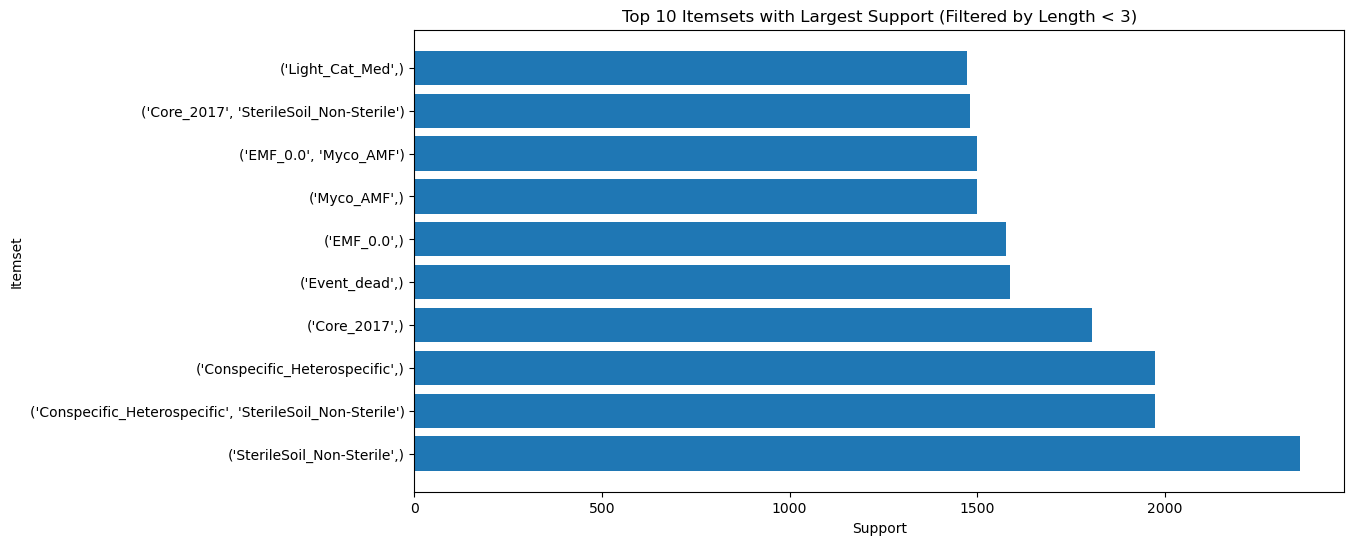

In [150]:
# Sort the filtered DataFrame by the 'Support' column
filtered_df = filtered_df.sort_values(by='Support', ascending=False)

# Get the top 10 itemsets with the largest support
top_itemsets = filtered_df.nlargest(10, 'Support')
# Plotting a horizontal bar chart for support of each itemset
plt.figure(figsize=(12, 6))
plt.barh(top_itemsets['Itemset'].astype(str), top_itemsets['Support'])
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.title(f'Top {10} Itemsets with Largest Support (Filtered by Length < 3)')
plt.show()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


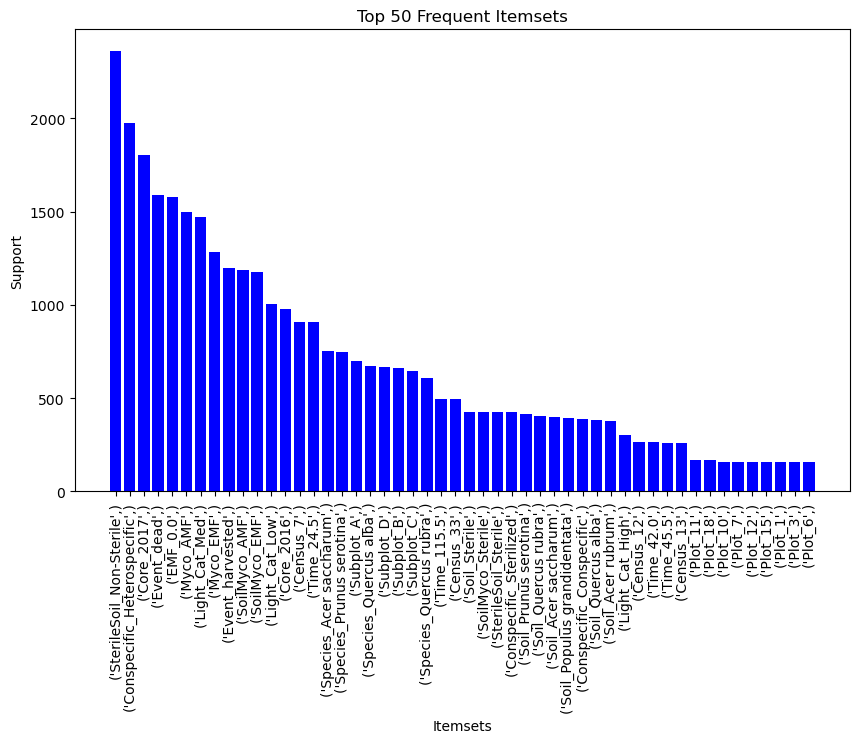

In [151]:
top_itemsets = sorted(itemsets[1].items(), key=lambda x: x[1], reverse=True)[:50]
itemset_names = [str(itemset[0]) for itemset in top_itemsets]
support_values = [support for _, support in top_itemsets]

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
plt.bar(itemset_names, support_values, color='blue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 50 Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()

In [152]:
display(rules)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{Conspecific_Heterospecific} -> {Census_12},
 {Census_12} -> {Conspecific_Heterospecific},
 {Census_12} -> {Core_2017},
 {EMF_0.0} -> {Census_12},
 {Census_12} -> {EMF_0.0},
 {Event_dead} -> {Census_12},
 {Census_12} -> {Event_dead},
 {Myco_AMF} -> {Census_12},
 {Census_12} -> {Myco_AMF},
 {Species_Prunus serotina} -> {Census_12},
 {Census_12} -> {Species_Prunus serotina},
 {SterileSoil_Non-Sterile} -> {Census_12},
 {Census_12} -> {SterileSoil_Non-Sterile},
 {Time_42.0} -> {Census_12},
 {Census_12} -> {Time_42.0},
 {Conspecific_Heterospecific} -> {Census_13},
 {Census_13} -> {Conspecific_Heterospecific},
 {Census_13} -> {Core_2017},
 {EMF_0.0} -> {Census_13},
 {Census_13} -> {EMF_0.0},
 {Event_dead} -> {Census_13},
 {Census_13} -> {Event_dead},
 {Census_13} -> {Light_Cat_Med},
 {Myco_AMF} -> {Census_13},
 {Census_13} -> {Myco_AMF},
 {Species_Acer saccharum} -> {Census_13},
 {Census_13} -> {Species_Acer saccharum},
 {Census_13} -> {SterileSoil_Non-Sterile},
 {Time_45.5} -> {Census_13},

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


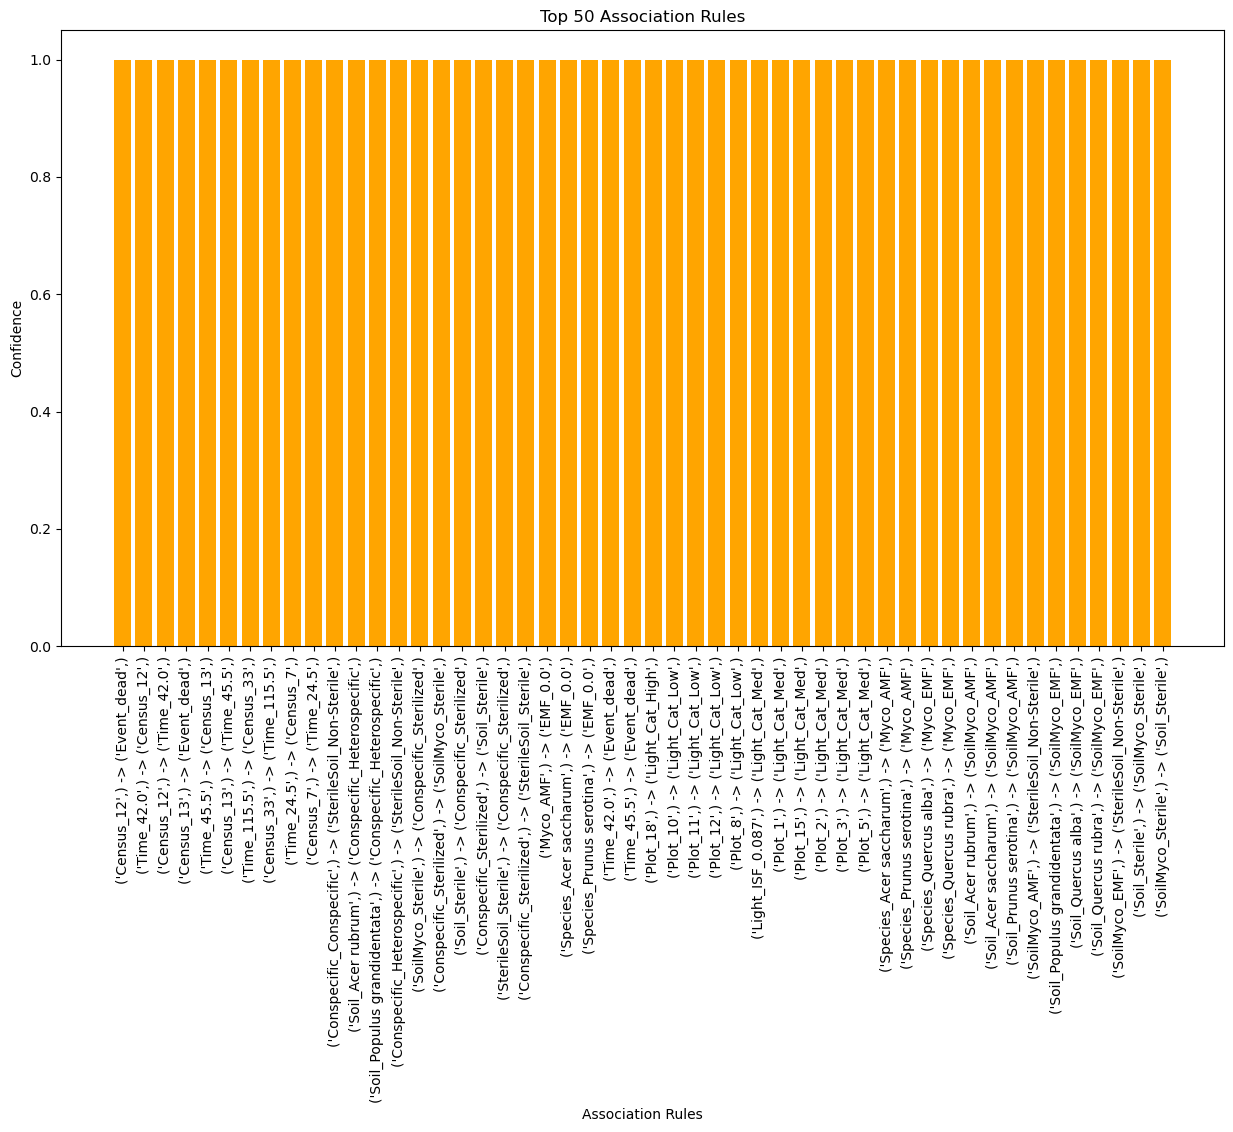

In [153]:
top_rules = sorted(rules, key=lambda x: x.confidence, reverse=True)[:50]
rule_names = [f"{str(rule.lhs)} -> {str(rule.rhs)}" for rule in top_rules]
confidence_values = [rule.confidence for rule in top_rules]

# Plotting association rules
plt.figure(figsize=(15, 8))
plt.bar(rule_names, confidence_values, color='orange')
plt.xlabel('Association Rules')
plt.ylabel('Confidence')
plt.title('Top 50 Association Rules')
plt.xticks(rotation=90)
plt.show()

In [154]:
# Sort rules based on lift
sorted_rules = sorted(rules, key=lambda rule: rule.lift)

# Extract relevant information for each rule
data = [{'Antecedent': rule.lhs, 'Consequent': rule.rhs, 'Confidence': rule.confidence,
         'Support': rule.support, 'Lift': rule.lift, 'Conviction': rule.conviction}
        for rule in sorted_rules]
# Create a DataFrame from the list of dictionaries
df_sorted_rules = pd.DataFrame(data)

# Display the sorted rules DataFrame
print(df_sorted_rules)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          Antecedent  \
0                (Myco_AMF, SterileSoil_Non-Sterile)   
1                                 (Event_harvested,)   
2       (EMF_0.0, Myco_AMF, SterileSoil_Non-Sterile)   
3                                 (Event_harvested,)   
4         (Event_harvested, SterileSoil_Non-Sterile)   
...                                              ...   
131448           (Conspecific_Sterilized, Time_24.5)   
131449               (Census_7, SterileSoil_Sterile)   
131450                      (Census_7, Soil_Sterile)   
131451                  (Census_7, SoilMyco_Sterile)   
131452            (Census_7, Conspecific_Sterilized)   

                                               Consequent  Confidence  \
0                                      (Event_harvested,)    0.118697   
1                     (Myco_AMF, SterileSoil_Non-Sterile)    0.127926   
2                                      (Event_harvested,)    0.118697   
3            (EMF_0.0, Myco_AMF, St

In [175]:
# Calculate the total number of itemsets
total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())

# Display the result
print("Total number of itemsets:", total_itemsets)

# Find the largest itemset
largest_itemset = max(itemsets.values(), key=lambda x: max(len(itemset) for itemset in x), default=None)
size = len(largest_itemset)

# Display the result
print("Size of the largest itemset:", size)

Total number of itemsets: 5907
Size of the largest itemset: 14
14


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
import time

# List of different min_support values to test
min_support_values = [0.5, 0.2, 0.1, 0.05, 0.03, 0.02, 0.009]

# Iterate over min_support values
for min_support in min_support_values:
    
    transactions = data_generator(tree_df)
    start_time = time.time()
    # Run the Apriori algorithm
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1)
    end_time = time.time()
    # Calculate the runtime
    runtime = end_time - start_time

    # Calculate the total number of itemsets
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    # Find the largest itemset
    largest_itemset = max(itemsets.values(), key=lambda x: max(len(itemset) for itemset in x), default=None)
    # Find the size of the largest itemset
    largest_itemset_size = max(len(itemset) for level_itemsets in itemsets.values() for itemset in level_itemsets)


    # Display the results
    print(f"Min Support: {min_support}")
    print(f"Number of Frequent Itemsets: {total_itemsets}")
    print(f"Largest Size of Frequent Itemsets: {largest_itemset_size}")
    print(f"Runtime: {runtime:.4f} seconds")
    print("\n" + "="*50 + "\n")

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Min Support: 0.5
Number of Frequent Itemsets: 10
Largest Size of Frequent Itemsets: 2
Runtime: 1.9064 seconds


Min Support: 0.2
Number of Frequent Itemsets: 249
Largest Size of Frequent Itemsets: 6
Runtime: 0.3335 seconds


Min Support: 0.1
Number of Frequent Itemsets: 1268
Largest Size of Frequent Itemsets: 7
Runtime: 0.6664 seconds


Min Support: 0.05
Number of Frequent Itemsets: 5907
Largest Size of Frequent Itemsets: 8
Runtime: 2.5995 seconds


Min Support: 0.03
Number of Frequent Itemsets: 16736
Largest Size of Frequent Itemsets: 8
Runtime: 7.8611 seconds


Min Support: 0.02
Number of Frequent Itemsets: 35768
Largest Size of Frequent Itemsets: 8
Runtime: 17.5385 seconds


Min Support: 0.009
Number of Frequent Itemsets: 142904
Largest Size of Frequent Itemsets: 8
Runtime: 80.9501 seconds




C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


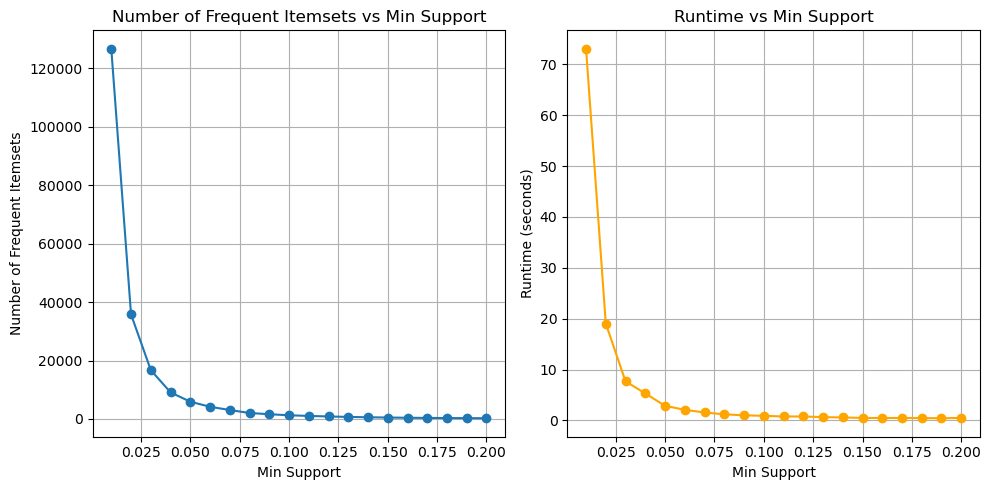

In [184]:
import time
import matplotlib.pyplot as plt

def data_generator(df):
    for _, row in df.dropna().iterrows():
        transaction = frozenset(str(item) for item in row)
        yield transaction

def count_frequent_itemsets(df, min_support):
    start_time = time.time()
    transactions = data_generator(df)
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1, verbosity=0)
    end_time = time.time()
    runtime = end_time - start_time
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    return total_itemsets, runtime

# Vary the min_support parameter and count frequent itemsets with runtime
min_support_values = [i / 100 for i in range(1, 21)]  # Vary from 0.01 to 0.20
results = [count_frequent_itemsets(tree_df, min_support) for min_support in min_support_values]

# Unpack results into separate lists
frequent_itemsets_count, runtimes = zip(*results)

# Plotting the graph for the number of frequent itemsets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, frequent_itemsets_count, marker='o')
plt.xlabel('Min Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets vs Min Support')
plt.grid(True)

# Plotting the graph for runtime
plt.subplot(1, 2, 2)
plt.plot(min_support_values, runtimes, marker='o', color='orange')
plt.xlabel('Min Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Min Support')
plt.grid(True)

plt.tight_layout()
plt.show()


From the above analysis, we can adjust min support to generate our desired number of frequent itemsets within a specific runtime.


#### Dataset: World Happiness Report

In [185]:
print(os.listdir("C:/Users/nsupr/OneDrive/Documents/Ntu docs/Y4S1/CZ4032/Assignment 2/world_happiness_report_data"))

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
happy_df = pd.read_csv('2019.csv', delimiter=',')
happy_df.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [215]:
happy_df.shape

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(156, 9)

In [216]:
has_nan = happy_df.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
for column in happy_df.columns:
    happy_df[column] = happy_df[column].apply(lambda x: f"{column}_{x}")

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
happy_df.head()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Overall rank_1,Country or region_Finland,Score_7.769,GDP per capita_1.34,Social support_1.587,Healthy life expectancy_0.986,Freedom to make life choices_0.596,Generosity_0.153,Perceptions of corruption_0.39299999999999996
1,Overall rank_2,Country or region_Denmark,Score_7.6,GDP per capita_1.383,Social support_1.5730000000000002,Healthy life expectancy_0.996,Freedom to make life choices_0.5920000000000001,Generosity_0.252,Perceptions of corruption_0.41
2,Overall rank_3,Country or region_Norway,Score_7.553999999999999,GDP per capita_1.4880000000000002,Social support_1.5819999999999999,Healthy life expectancy_1.028,Freedom to make life choices_0.603,Generosity_0.271,Perceptions of corruption_0.341
3,Overall rank_4,Country or region_Iceland,Score_7.494,GDP per capita_1.38,Social support_1.624,Healthy life expectancy_1.026,Freedom to make life choices_0.591,Generosity_0.354,Perceptions of corruption_0.11800000000000001
4,Overall rank_5,Country or region_Netherlands,Score_7.4879999999999995,GDP per capita_1.396,Social support_1.5219999999999998,Healthy life expectancy_0.9990000000000001,Freedom to make life choices_0.557,Generosity_0.322,Perceptions of corruption_0.298


In [265]:
def data_generator(df):
        for _, row in df.dropna().iterrows():
            transaction = frozenset(str(item) for item in row)
            yield transaction

transactions = data_generator(happy_df)
# Iterate over the generator
itemsets, rules = ap(transactions, min_support=0.006, min_confidence=0.1, verbosity = 1)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating itemsets.
 Counting itemsets of length 1.
  Found 1238 candidate itemsets of length 1.
  Found 1238 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 765703 candidate itemsets of length 2.
  Found 5614 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 13107 candidate itemsets of length 3.
  Found 13104 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 19656 candidate itemsets of length 4.
  Found 19656 large itemsets of length 4.
 Counting itemsets of length 5.
  Found 19656 candidate itemsets of length 5.
  Found 19656 large itemsets of length 5.
 Counting itemsets of length 6.
  Found 13104 candidate itemsets of length 6.
  Found 13104 large itemsets of length 6.
 Counting itemsets of length 7.
  Found 5616 candidate itemsets of length 7.
  Found 5616 large itemsets of length 7.
 Counting itemsets of length 8.
  Found 1404 candidate itemsets of length 8.
  Found 1404 large itemsets of length 8.
Itemset generation termin

In [266]:
print("Number of lengths for frequent itemsets: ", len(itemsets))
print("Rules identified: ", len(rules))

Number of lengths for frequent itemsets:  8
Rules identified:  2831396


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
# Convert the dictionary to a Pandas DataFrame
df_frequent_itemsets = pd.DataFrame([(item, len(item), support) for length, items in itemsets.items() for item, support in items.items()], columns=['Itemset', 'Length', 'Support'])

# Display the DataFrame
print(df_frequent_itemsets)

                                                 Itemset  Length  Support
0       (Perceptions of corruption_0.39299999999999996,)       1        1
1                                 (GDP per capita_1.34,)       1        1
2                                      (Overall rank_1,)       1        1
3                           (Country or region_Finland,)       1        1
4                                    (Generosity_0.153,)       1        4
...                                                  ...     ...      ...
79387  (Freedom to make life choices_0.596, GDP per c...       8        1
79388  (Freedom to make life choices_0.598, GDP per c...       8        1
79389  (Freedom to make life choices_0.603, GDP per c...       8        1
79390  (Freedom to make life choices_0.609, GDP per c...       8        1
79391  (Freedom to make life choices_0.631, GDP per c...       8        1

[79392 rows x 3 columns]


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


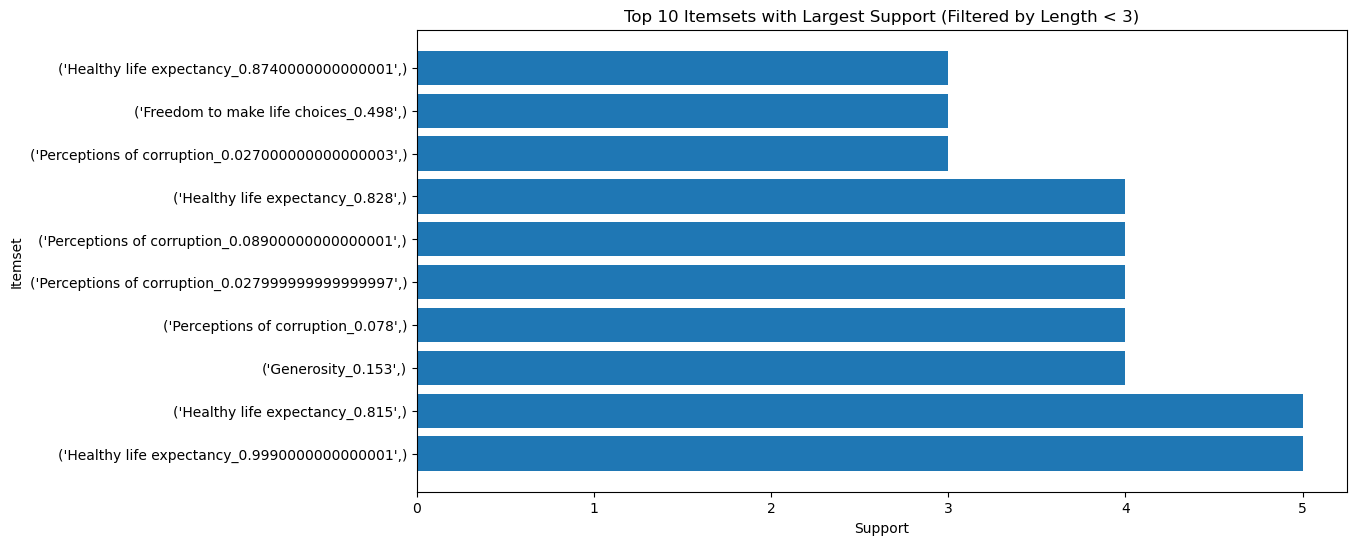

In [268]:
# Filter the DataFrame for itemsets with length < 3
filtered_df = df_frequent_itemsets[df_frequent_itemsets['Length'] < 3]

# Sort the filtered DataFrame by the 'Support' column
filtered_df = filtered_df.sort_values(by='Support', ascending=False)

# Get the top 10 itemsets with the largest support
top_itemsets = filtered_df.nlargest(10, 'Support')
# Plotting a horizontal bar chart for support of each itemset
plt.figure(figsize=(12, 6))
plt.barh(top_itemsets['Itemset'].astype(str), top_itemsets['Support'])
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.title(f'Top {10} Itemsets with Largest Support (Filtered by Length < 3)')
plt.show()

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


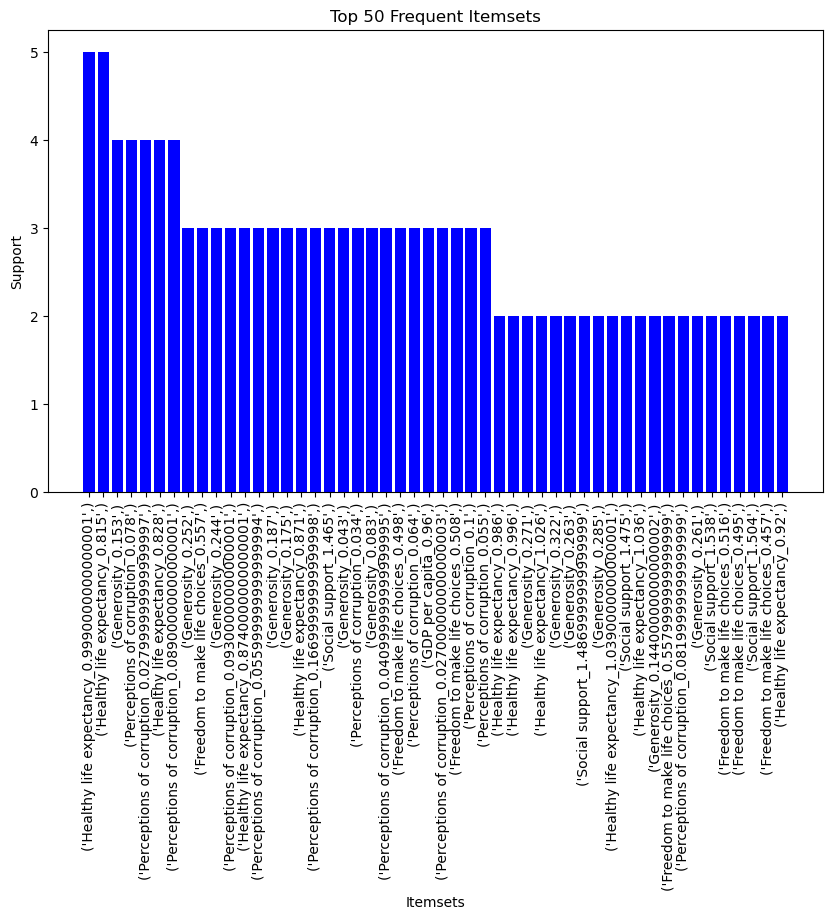

In [269]:
top_itemsets = sorted(itemsets[1].items(), key=lambda x: x[1], reverse=True)[:50]
itemset_names = [str(itemset[0]) for itemset in top_itemsets]
support_values = [support for _, support in top_itemsets]

# Plotting frequent itemsets
plt.figure(figsize=(10, 6))
plt.bar(itemset_names, support_values, color='blue')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 50 Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()

In [270]:
display(rules)

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{Freedom to make life choices_0.0} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Freedom to make life choices_0.0},
 {GDP per capita_0.35} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {GDP per capita_0.35},
 {Generosity_0.158} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Generosity_0.158},
 {Healthy life expectancy_0.361} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Healthy life expectancy_0.361},
 {Overall rank_154} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Overall rank_154},
 {Perceptions of corruption_0.025} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Perceptions of corruption_0.025},
 {Score_3.2030000000000003} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Score_3.2030000000000003},
 {Social support_0.517} -> {Country or region_Afghanistan},
 {Country or region_Afghanistan} -> {Social su

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


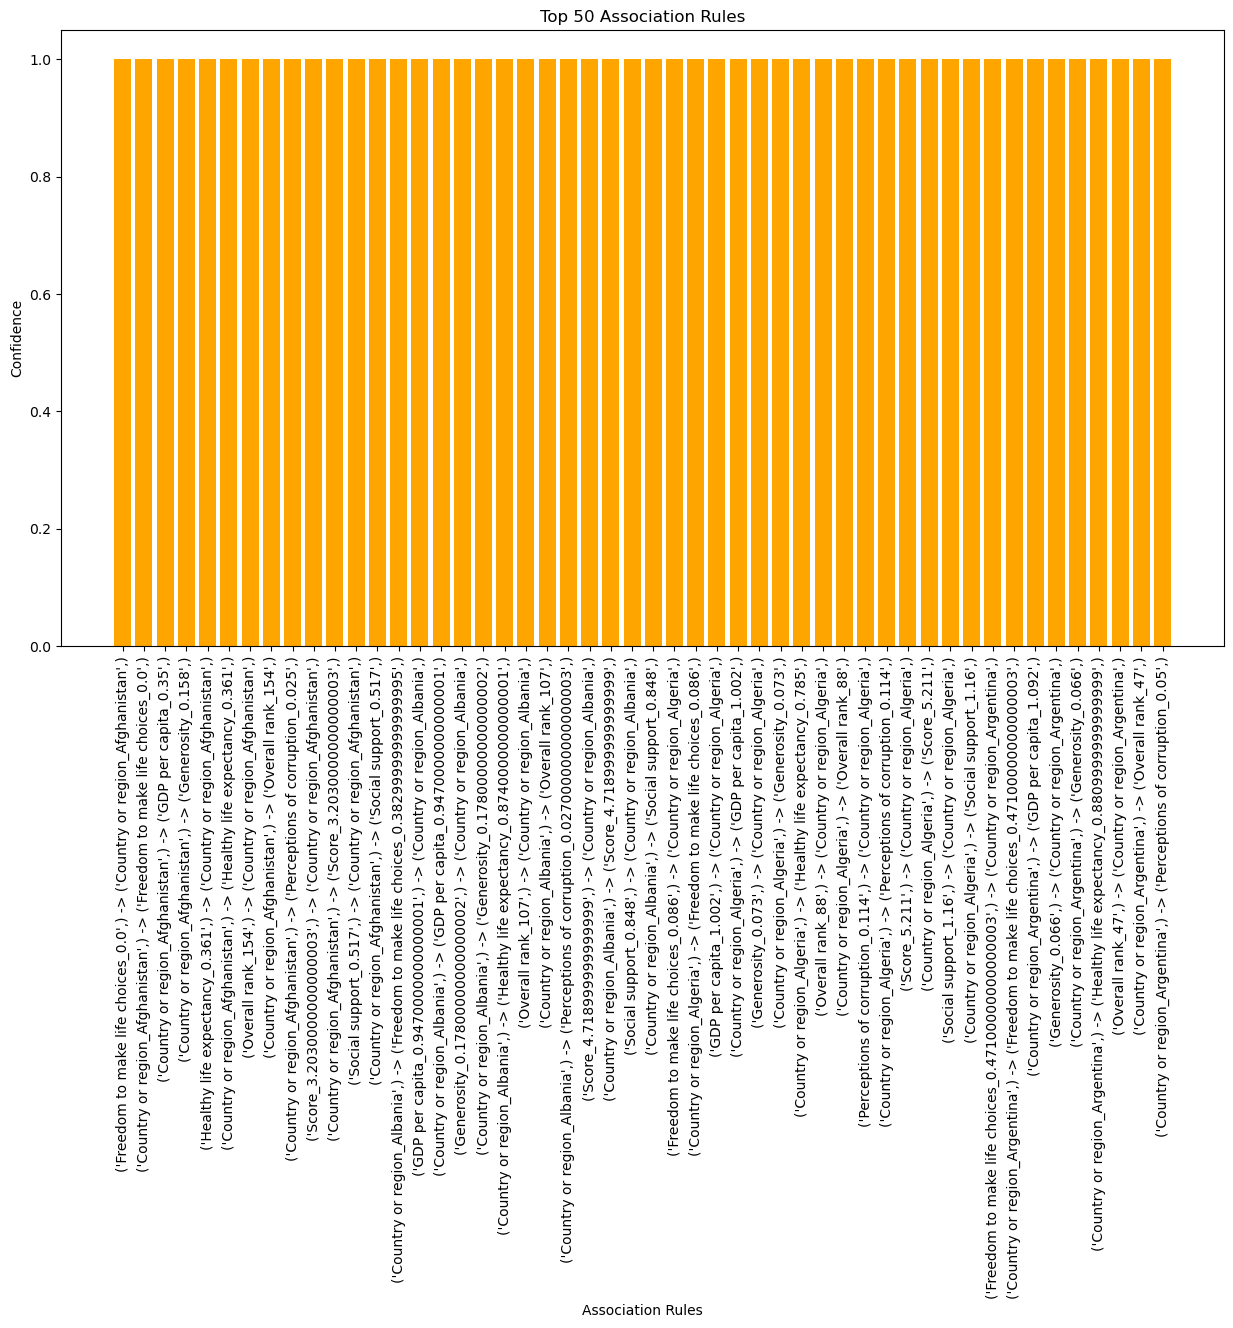

In [271]:
top_rules = sorted(rules, key=lambda x: x.confidence, reverse=True)[:50]
rule_names = [f"{str(rule.lhs)} -> {str(rule.rhs)}" for rule in top_rules]
confidence_values = [rule.confidence for rule in top_rules]

# Plotting association rules
plt.figure(figsize=(15, 8))
plt.bar(rule_names, confidence_values, color='orange')
plt.xlabel('Association Rules')
plt.ylabel('Confidence')
plt.title('Top 50 Association Rules')
plt.xticks(rotation=90)
plt.show()

In [272]:
# Sort rules based on lift
sorted_rules = sorted(rules, key=lambda rule: rule.lift)

# Extract relevant information for each rule
data = [{'Antecedent': rule.lhs, 'Consequent': rule.rhs, 'Confidence': rule.confidence,
         'Support': rule.support, 'Lift': rule.lift, 'Conviction': rule.conviction}
        for rule in sorted_rules]
# Create a DataFrame from the list of dictionaries
df_sorted_rules = pd.DataFrame(data)

# Display the sorted rules DataFrame
print(df_sorted_rules)


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                Antecedent  \
0        (Perceptions of corruption_0.027999999999999997,)   
1                         (Healthy life expectancy_0.828,)   
2                       (Perceptions of corruption_0.078,)   
3                         (Healthy life expectancy_0.828,)   
4            (Healthy life expectancy_0.9990000000000001,)   
...                                                    ...   
2831391                  (Perceptions of corruption_0.24,)   
2831392                                 (Overall rank_41,)   
2831393      (Healthy life expectancy_0.7559999999999999,)   
2831394                            (GDP per capita_0.745,)   
2831395              (Freedom to make life choices_0.631,)   

                                                Consequent  Confidence  \
0                         (Healthy life expectancy_0.828,)        0.25   
1        (Perceptions of corruption_0.027999999999999997,)        0.25   
2                         (Health

In [273]:
# Calculate the total number of itemsets
total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())

# Display the result
print("Total number of itemsets:", total_itemsets)

# Find the largest itemset
largest_itemset = max(itemsets.values(), key=lambda x: max(len(itemset) for itemset in x), default=None)
size = len(largest_itemset)

# Display the result
print("Size of the largest itemset:", size)

Total number of itemsets: 79392
Size of the largest itemset: 1404


C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [277]:
import time

# List of different min_support values to test
min_support_values = [0.1, 0.05, 0.03, 0.02, 0.005, 0.006, 0.009]

# Iterate over min_support values
for min_support in min_support_values:
    
    transactions = data_generator(happy_df)
    start_time = time.time()
    # Run the Apriori algorithm
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1)
    end_time = time.time()
    # Calculate the runtime
    runtime = end_time - start_time

    # Calculate the total number of itemsets
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    # Find the largest itemset
    largest_itemset = max(itemsets.values(), key=lambda x: max(len(itemset) for itemset in x), default=None)
    # Find the size of the largest itemset
    if largest_itemset is not None:
    # Find the size of the largest itemset
        largest_itemset_size = max(len(itemset) for level_itemsets in largest_itemset for itemset in level_itemsets)
    else:
        print("No frequent itemsets found.")


    # Display the results
    print(f"Min Support: {min_support}")
    print(f"Number of Frequent Itemsets: {total_itemsets}")
    print(f"Largest Size of Frequent Itemsets: {largest_itemset_size}")
    print(f"Runtime: {runtime:.4f} seconds")
    print("\n" + "="*50 + "\n")
print("End of results")

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No frequent itemsets found.
Min Support: 0.1
Number of Frequent Itemsets: 0
Largest Size of Frequent Itemsets: 34
Runtime: 0.0179 seconds


No frequent itemsets found.
Min Support: 0.05
Number of Frequent Itemsets: 0
Largest Size of Frequent Itemsets: 34
Runtime: 0.0156 seconds


Min Support: 0.03
Number of Frequent Itemsets: 2
Largest Size of Frequent Itemsets: 42
Runtime: 0.0173 seconds


Min Support: 0.02
Number of Frequent Itemsets: 7
Largest Size of Frequent Itemsets: 46
Runtime: 0.0127 seconds


Min Support: 0.005
Number of Frequent Itemsets: 79392
Largest Size of Frequent Itemsets: 49
Runtime: 26.2528 seconds


Min Support: 0.006
Number of Frequent Itemsets: 79392
Largest Size of Frequent Itemsets: 49
Runtime: 27.5151 seconds


Min Support: 0.009
Number of Frequent Itemsets: 130
Largest Size of Frequent Itemsets: 34
Runtime: 0.5325 seconds


End of results


The number of frequent itemsets plateaus if we decrease min support below 0.006 suggesting that 79392 could be the maximum itemsets that can be generated for this dataset.

C:\Users\nsupr\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


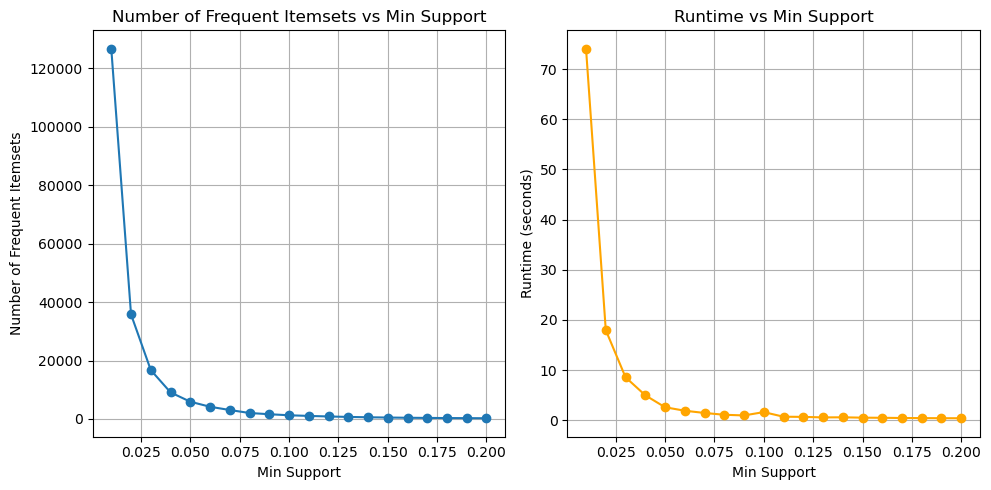

In [278]:
def data_generator(df):
    for _, row in df.dropna().iterrows():
        transaction = frozenset(str(item) for item in row)
        yield transaction

def count_frequent_itemsets(df, min_support):
    start_time = time.time()
    transactions = data_generator(df)
    itemsets, _ = ap(transactions, min_support=min_support, min_confidence=0.1, verbosity=0)
    end_time = time.time()
    runtime = end_time - start_time
    total_itemsets = sum(len(level_itemsets) for level_itemsets in itemsets.values())
    return total_itemsets, runtime

# Vary the min_support parameter and count frequent itemsets with runtime
min_support_values = [i / 100 for i in range(1, 21)]  # Vary from 0.01 to 0.20
results = [count_frequent_itemsets(tree_df, min_support) for min_support in min_support_values]

# Unpack results into separate lists
frequent_itemsets_count, runtimes = zip(*results)

# Plotting the graph for the number of frequent itemsets
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, frequent_itemsets_count, marker='o')
plt.xlabel('Min Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Number of Frequent Itemsets vs Min Support')
plt.grid(True)

# Plotting the graph for runtime
plt.subplot(1, 2, 2)
plt.plot(min_support_values, runtimes, marker='o', color='orange')
plt.xlabel('Min Support')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Min Support')
plt.grid(True)

plt.tight_layout()
plt.show()


The highest number of frequent itemsets are generated when the min support is 0.009. There is also a slight dip in the runtime when min support ranges from 0.2 to 0.05, suggesting there could be a minimum runtime for a given min support. 